In [73]:
waypoints =  [(0, 0), (82, 13), (95, 78), (97, 10), (55, 32), (29, 52), (63, 31), (79, 74), (97, 52), (72, 58), (33, 33), (46, 59), (64, 38), (47, 95), (95, 53), (69, 40), (25, 74), (59, 96), (77, 51), (60, 27), (47, 51)]
speed = 10

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import math
tsp_out = pd.read_csv('TSP_time.csv')

In [37]:
def distance(p1, p2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)


In [38]:
print()

10 57.884787889603274
11 65.53325190008202
12 65.82920495883987
13 75.4127772656251
14 75.67556222821109
15 73.20258460805358
16 79.91969007009989
17 83.11278281583427
18 95.30111891972109
19 101.1697112864899
20 107.47597592774069
20 107.47597592774069


In [57]:
waypoints = [(0, 0), (91, 70), (69, 77), (68, 100), (95, 8), (6, 28), (31, 12), (47, 35), (32, 3), (55, 19), (93, 100)]

In [75]:
total_time = 0
ordered_points = [waypoints[int(node)] for node in x.split() if node.isdigit()]
# print(x)
# for i in range(len(ordered_points) - 1):
#     # print(ordered_points[i], ordered_points[i+1])
#     total_time += distance(ordered_points[i], ordered_points[i+1]) / speed
#     total_time += 1/6  # add waiting time at each waypoint
# total_time -= 1/6
# print(len(ordered_points)-2,total_time)

In [123]:
ordereds = tsp_out['TSPOut'][0]
ordereds

' \n 0 -> 10 -> 4 -> 6 -> 1 -> 3 -> 8 -> 2 -> 7 -> 9 -> 5 -> 0\n'

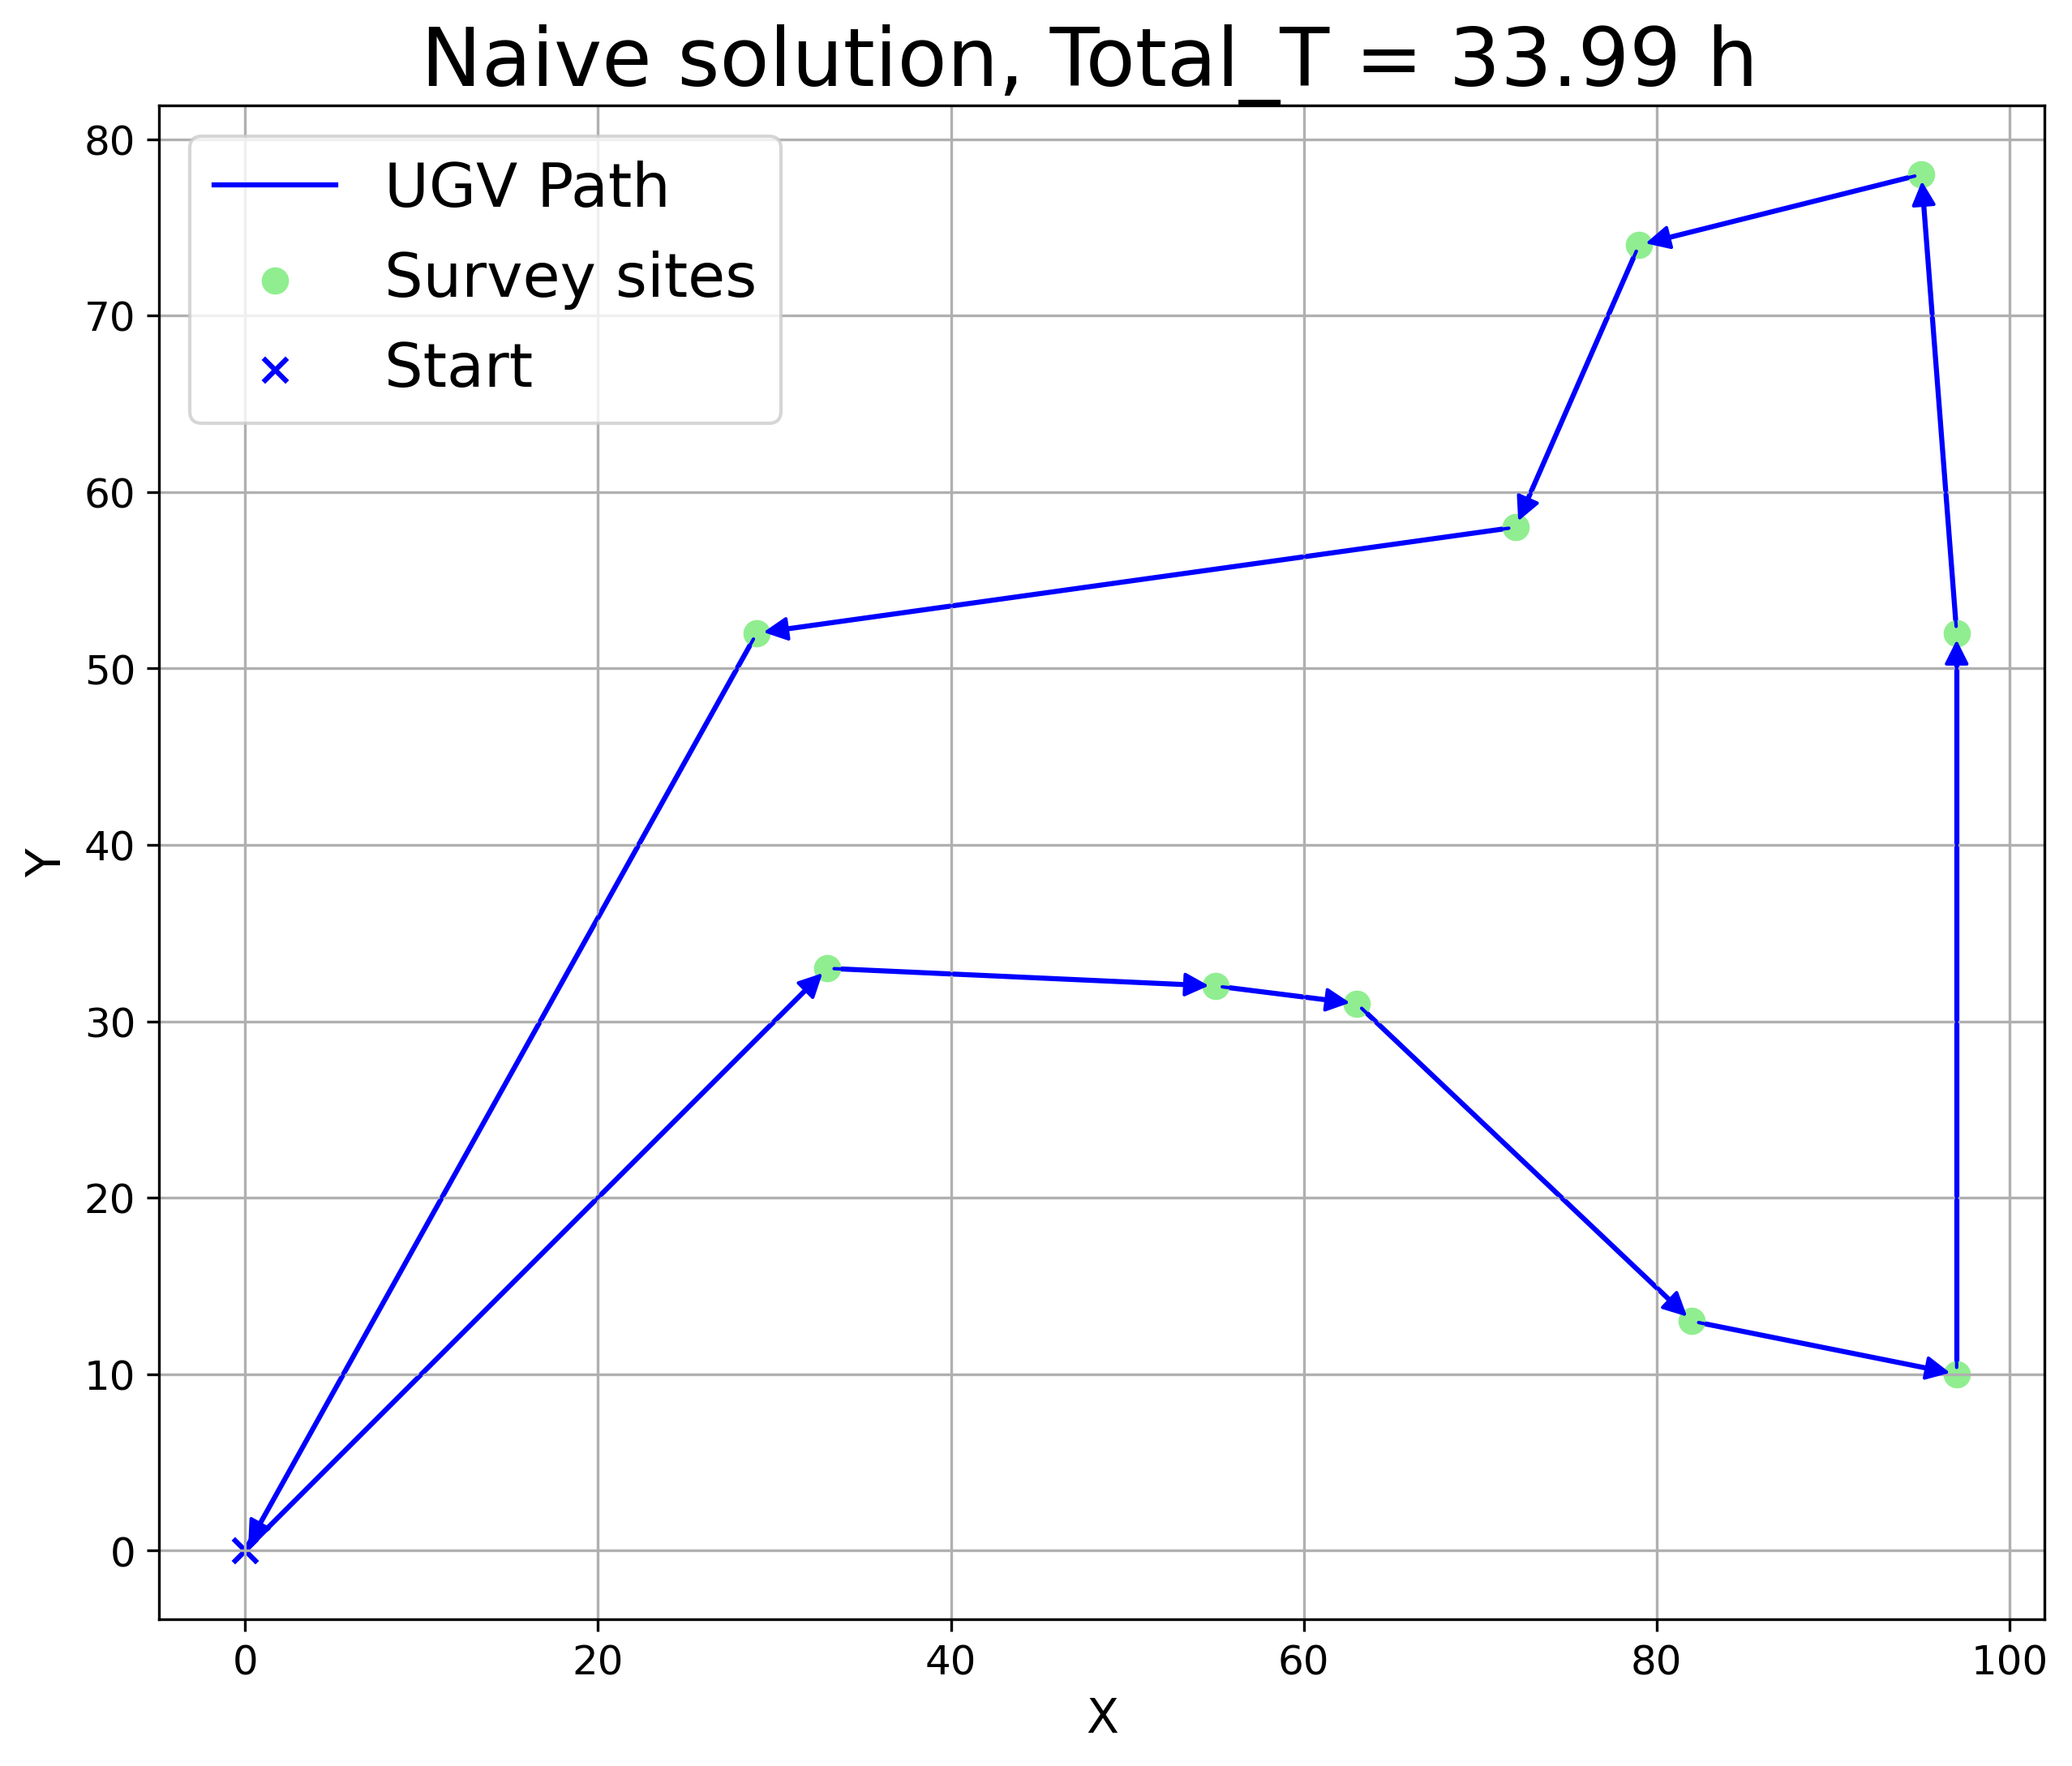

In [130]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import ast
ordered_points = tsp_out['waypoints'][0]
ordered_points = ast.literal_eval(ordered_points)
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)  # Increased DPI

for i in range(0,len(ordered_points)-1):
    start_point = ordered_points[i]
    end_point = ordered_points[i+1]
    
    # Line and arrow
    line = ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'b-', label='UGV Path' if i == 0 else "", zorder=1)
    arrow = FancyArrowPatch(posA=start_point, posB=end_point, mutation_scale=15, arrowstyle="-|>", color="b", zorder=2)
    ax.add_patch(arrow)

    # Add the light green point at start_point with high zorder and label only for the first point
    if i == 0:
        pass
    else:
        ax.scatter(*start_point, c='lightgreen', s=50, label='Survey sites' if i == 1 else "", zorder=1)

# line = ax.plot(*ordered_points[0], *ordered_points[1], 'b-', label='UGV Path' if i == 0 else "", zorder=1)
# arrow = FancyArrowPatch(posA=start_point, posB=end_point, mutation_scale=15, arrowstyle="-|>", color="b", zorder=1)
# ax.add_patch(arrow)
# Also, add a light green point for the last ordered_point as it's not covered in the loop
ax.scatter(*ordered_points[0], color='b',s=50, marker='x', label='Start')  # Plotting st
ax.set_title(f"Naive solution, Total_T = {round(tsp_out['missiontime'][0],2)} h ", fontsize=24)  # Increased fontsize
ax.set_xlabel("X", fontsize=14)  # Increased fontsize
ax.set_ylabel("Y", fontsize=14)  # Increased fontsize
ax.grid(True)

ax.set_aspect('equal', adjustable='box')

# Displaying the legend
ax.legend(fontsize=18)

plt.xticks(fontsize=12)  # Increase fontsize for xticks
plt.yticks(fontsize=12)  # Increase fontsize for yticks
plt.show()
